In [1]:
import win32com.client
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

sns.set(style='darkgrid', font_scale=1.4)

In [2]:
def get_site(x):
    y = re.search(r'Site:<.*>', x)
    y = y[0][6:-1]
    return int(y)

def get_location(x):
    y = re.search(r'Stand:<.*> ', x)
    y = y[0][7:-2]
    return y

def get_alert_type(x):
    y = re.search(r'Alert:<.*> A', x)
    y = y[0][7:-3]
    return y

def get_date(x):
    y = re.search(r'Date : .*', x)
    y = pd.Timestamp(y[0][7:-1])
    return y

def get_hour(x):
    y = get_date(x)
    y = y.time().hour
    return y

In [3]:
casinoDict = dict()

casinoDict[411] = 'Boomtown'
casinoDict[412] = 'Camrose Resort Casino'
casinoDict[413] = 'Cash Calgary'
casinoDict[414] = 'Cash Casino'
casinoDict[415] = 'Casino Dene'
casinoDict[416] = 'Casino Calgary'
casinoDict[417] = 'Casino Edmonton'
casinoDict[418] = 'Casino Lethbridge'
casinoDict[419] = 'Casino Yellowhead'
casinoDict[420] = 'Century St. Albert'
casinoDict[421] = 'Century Calgary'
casinoDict[422] = 'Century Edmonton'
casinoDict[423] = 'Century Downs'
casinoDict[424] = 'Cowboys'
casinoDict[425] = 'Eagle River'
casinoDict[426] = 'Elbow River'
casinoDict[427] = 'Deerfoot'
casinoDict[428] = 'Grand Villa'
casinoDict[429] = 'Great Northern'
casinoDict[430] = 'Grey Eagle'
casinoDict[431] = 'Jackpot Casino'
casinoDict[432] = 'Starlight'
casinoDict[433] = 'River Cree'
casinoDict[434] = 'Stonkey Nakoda Resort'
casinoDict[435] = 'Copper Coulee'
casinoDict[436] = 'Evergreen Park'
casinoDict[437] = 'Whoop Up Downs'
casinoDict[440] = 'Century Mile'

casinoDict = pd.DataFrame(pd.Series(casinoDict), columns=['casino'])

In [4]:
outlook = win32com.client.Dispatch("Outlook.Application").GetNamespace("MAPI")
inbox = outlook.Folders('Michelle.Parenteau@aglc.ca').Folders('Inbox').Folders('alerts')
messages = inbox.Items

In [5]:
data = pd.DataFrame(columns=['subject', 'body'])

k = 0
for message in messages:
    data.loc[k, 'subject'] = message.subject
    data.loc[k, 'body'] = message.body
    k += 1

In [6]:
data['site'] = data.subject.apply(lambda x: get_site(x))
data['location'] = data.subject.apply(lambda x: get_location(x))
data['type'] = data.subject.apply(lambda x: get_alert_type(x).strip())
data['date'] = data.body.apply(lambda x: get_date(x).date())
data['hour'] = data.body.apply(lambda x: get_hour(x))

In [7]:
data = data.merge(casinoDict, left_on='site', right_index=True)

In [8]:
data.to_csv('email_data.csv', index=False)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

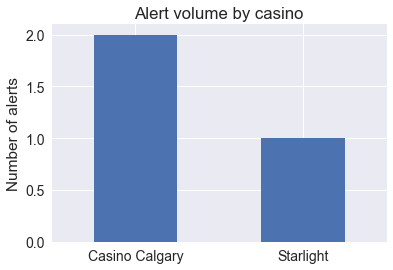

In [9]:
volumeByCasino = data.groupby('casino').agg({'subject':'count'})

f, ax = plt.subplots(figsize=(6,4))

volumeByCasino.plot(ax=ax, kind='bar', legend=None)

ax.set_xlabel('')
ax.set_ylabel('Number of alerts')
ax.set_title('Alert volume by casino')

plt.xticks(rotation='horizontal')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

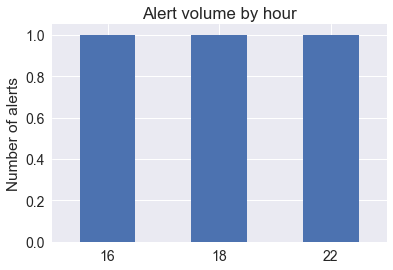

In [10]:
volumeByHour = data.groupby('hour').agg({'subject':'count'}).sort_index()

f, ax = plt.subplots(figsize=(6,4))

volumeByHour.plot(ax=ax, kind='bar', legend=None)

ax.set_xlabel('')
ax.set_ylabel('Number of alerts')
ax.set_title('Alert volume by hour')

plt.xticks(rotation='horizontal')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

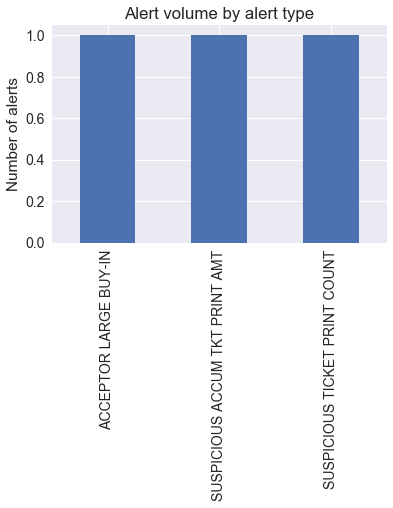

In [11]:
volumeByType = data.groupby('type').agg({'subject':'count'}).sort_index()

f, ax = plt.subplots(figsize=(6,4))

volumeByType.plot(ax=ax, kind='bar', legend=None)

ax.set_xlabel('')
ax.set_ylabel('Number of alerts')
ax.set_title('Alert volume by alert type')

plt.xticks(rotation='vertical')